This is the Plant Village dataset from Kaggle which can be downloaded at https://www.kaggle.com/datasets/arjuntejaswi/plant-village.  There are 15 directories of peppers, potatoes and tomatoes.  The full dataset contains contains around 87,000 images of leaves — diseased and healthy. The images represent 14 plants over 38 classes:


In [63]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

import pandas as pd
import os, glob
import seaborn as sns

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [3]:
#use tensorflow to download images into tf.data.dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/PlantVillage", #this is the data directory
    seed=123,
    shuffle=True,#it will randomly shuffle images and load them 
    image_size=(IMAGE_SIZE,IMAGE_SIZE),#all images are 256 x 256
    batch_size=BATCH_SIZE #32 is standard batch size
)

Found 2152 files belonging to 3 classes.


In [4]:
#3 folder names
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
#every element you get is a tensor so oyu need to convert to numpy
#there are 32 images in each batch
#each image is 256 x 256
#3 is RGB, the channels
#labels are 0 ('Potato___Early_blight'),1 ('Potato___Late_blight'),2 ('Potato___healthy')
#one batch is 32 images
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
(32,)
[1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]


In [7]:
#print the 1st image
#it's a tensor.
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[163. 161. 172.]
  [129. 127. 138.]
  [108. 106. 117.]
  ...
  [163. 161. 175.]
  [158. 156. 170.]
  [153. 151. 165.]]

 [[149. 147. 158.]
  [ 98.  96. 107.]
  [144. 142. 153.]
  ...
  [159. 157. 171.]
  [165. 163. 177.]
  [168. 166. 180.]]

 [[100.  98. 109.]
  [117. 115. 126.]
  [188. 186. 199.]
  ...
  [163. 161. 175.]
  [164. 162. 176.]
  [164. 162. 176.]]

 ...

 [[142. 138. 153.]
  [120. 116. 131.]
  [136. 132. 147.]
  ...
  [180. 178. 191.]
  [178. 176. 189.]
  [189. 187. 200.]]

 [[118. 114. 129.]
  [102.  98. 113.]
  [157. 153. 168.]
  ...
  [177. 175. 188.]
  [172. 170. 183.]
  [177. 175. 188.]]

 [[123. 119. 134.]
  [128. 124. 139.]
  [148. 144. 159.]
  ...
  [205. 203. 216.]
  [188. 186. 199.]
  [173. 171. 184.]]], shape=(256, 256, 3), dtype=float32)


In [8]:
#to convert tensor to numpy
#color is represented w/number between 0 and 255
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[161. 146. 151.]
  [147. 132. 137.]
  [143. 128. 133.]
  ...
  [162. 142. 151.]
  [163. 143. 152.]
  [164. 144. 153.]]

 [[146. 131. 136.]
  [147. 132. 137.]
  [145. 130. 135.]
  ...
  [163. 143. 152.]
  [164. 144. 153.]
  [165. 145. 154.]]

 [[145. 130. 135.]
  [147. 132. 137.]
  [147. 132. 137.]
  ...
  [162. 142. 151.]
  [163. 143. 152.]
  [163. 143. 152.]]

 ...

 [[180. 166. 166.]
  [182. 168. 168.]
  [182. 168. 168.]
  ...
  [174. 159. 164.]
  [171. 156. 161.]
  [169. 154. 159.]]

 [[173. 159. 159.]
  [180. 166. 166.]
  [183. 169. 169.]
  ...
  [177. 162. 167.]
  [173. 158. 163.]
  [170. 155. 160.]]

 [[160. 146. 146.]
  [172. 158. 158.]
  [179. 165. 165.]
  ...
  [178. 163. 168.]
  [175. 160. 165.]
  [172. 157. 162.]]]


In [9]:
#shape of 1st image
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


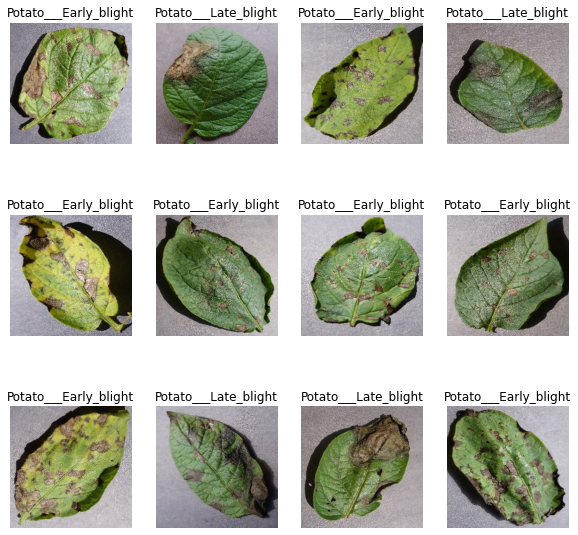

In [10]:
#visualizee image
#shape of 1st image
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12): #display 12 of the batch of 32
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('Off')

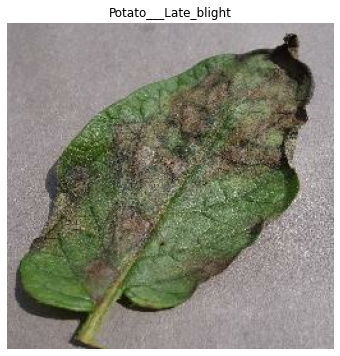

In [11]:
plt.figure(figsize=(6,6))
for image_batch, label_batch in dataset.take(1):
    for i in range(12): #display 12 of the batch of 32
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[0]])
        #print(image_batch[0].shape)
        plt.axis('Off')

### Split data
Split dataset into train test split

In [12]:
"""
#actual length is 68 into 32 b/c each element is 32 batches
#test split will be further split into validation set
#80% is training
#20% is test --> test(10%), validation -->(10%)
#after every epoch we'll use validation data set to do the validation
#Once we've gone through 50 epochs, then we use test dataset to measure accuracy of our model 
Use test dataset to test performance of our model
length of dataset is 68
"""
train_size = 0.8
len(dataset) * train_size
#dataset.take(10) #take 10 samples

54.400000000000006

In [13]:
#take 1st 54 batches, each batch is 32
train_ds = dataset.take(54) #take 10 samples. Like the 1st 54 arr[:54]
train_ds
len(train_ds)

54

In [14]:
#skipping the 1st 54 and getting the remaining 54
test_ds = dataset.skip(54) #arr[54:]
len(test_ds)

14

In [15]:
val_size = 0.1 #10%.  10% of actual dataset is. 6.8
#need 6 samples from test dataset
len(dataset) * val_size

6.800000000000001

In [16]:
#6 samples
val_ds = test_ds.take(6)
len(val_ds)

6

In [17]:
test_ds = test_ds.skip(6)

In [18]:
len(test_ds)

8

In [19]:
#take tensorflow dataset 
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size =  int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds,val_ds, test_ds

In [20]:
train_ds,val_ds,  test_ds = get_dataset_partitions_tf(dataset)

In [21]:
len(train_ds)

54

In [22]:
len(val_ds)

6

In [23]:
len(test_ds)

8

In [24]:
"""
cache()-it will read image from the disk, for the next iteration when you need the same image it will keep it in memory
It improves performance of your pipeline
prefetch()-if GPU is training, prefectch will load the next set of batch from your disk which will improve performance
"""
train_ds.cache().shuffle(1000)

<ShuffleDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### Full Plant Village Dataset

In [26]:
#use tensorflow to download images into tf.data.dataset
dataset_1 = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/PlantVillage_full", #this is the data directory
    seed=123,
    shuffle=True,#it will randomly shuffle images and load them 
    image_size=(IMAGE_SIZE,IMAGE_SIZE),#all images are 256 x 256
    batch_size=BATCH_SIZE #32 is standard batch size
)

Found 20638 files belonging to 15 classes.


In [28]:
class_names = dataset_1.class_names
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [27]:
for image_batch, label_batch in dataset_1.take(1):
    print(image_batch.shape)
    print(label_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
(32,)
[14  9 14  6  3  0  7  6  3 11  9  8  5  3  3  5  5  9 10  6 14 14  2  2
 14  6  5  2  9 12  2  8]


In [30]:
#shape of 10th image
for image_batch, label_batch in dataset_1.take(1):
    print(image_batch[10].shape)

(256, 256, 3)


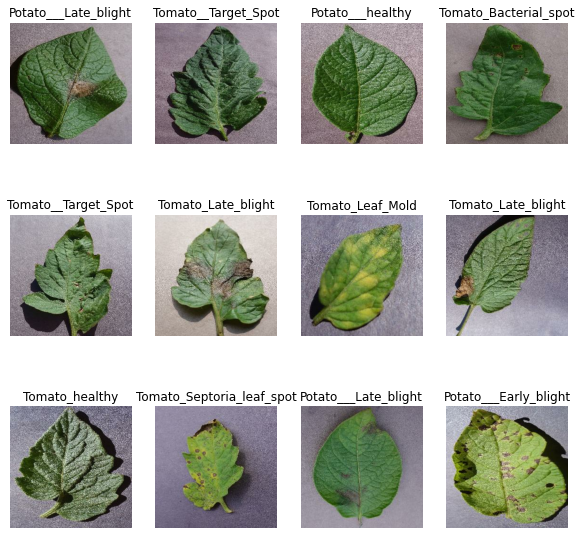

In [31]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset_1.take(1):
    for i in range(12): #display 12 of the batch of 32
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('Off')

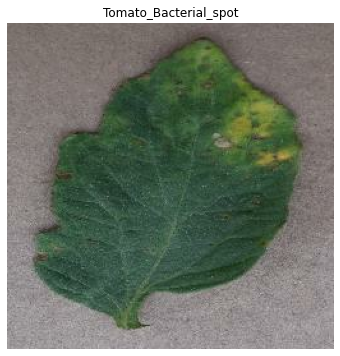

In [32]:
plt.figure(figsize=(6,6))
for image_batch, label_batch in dataset_1.take(1):
    for i in range(12): #display 12 of the batch of 32
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[0]])
        #print(image_batch[0].shape)
        plt.axis('Off')

In [33]:
len(dataset_1)

645

In [34]:
#take tensorflow dataset 
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size =  int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds,val_ds, test_ds

In [36]:
train_ds,val_ds,  test_ds = get_dataset_partitions_tf(dataset_1)

In [37]:
len(train_ds)

516

In [38]:
len(val_ds)

64

In [39]:
len(test_ds)

65

In [54]:
file_path = "dataset/PlantVillage_full"

In [55]:
name_class = os.listdir(file_path)
name_class

['Tomato_healthy',
 'Potato___Early_blight',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Early_blight',
 'Tomato__Target_Spot',
 'Potato___Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_Septoria_leaf_spot',
 'Tomato__Tomato_mosaic_virus',
 'Pepper__bell___Bacterial_spot',
 'Tomato_Bacterial_spot',
 'Tomato_Late_blight',
 'Pepper__bell___healthy',
 'Potato___healthy']

In [58]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [61]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,dataset/PlantVillage_full/Tomato_Spider_mites_...,Tomato_Spider_mites_Two_spotted_spider_mite
1,dataset/PlantVillage_full/Potato___Late_blight...,Potato___Late_blight
2,dataset/PlantVillage_full/Tomato__Tomato_mosai...,Tomato__Tomato_mosaic_virus
3,dataset/PlantVillage_full/Tomato_healthy/739d1...,Tomato_healthy
4,dataset/PlantVillage_full/Tomato_healthy/4463e...,Tomato_healthy


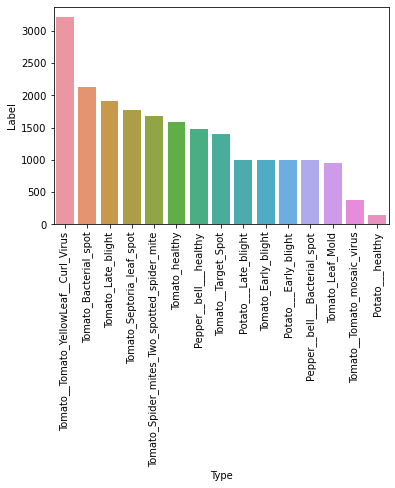

In [64]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);